# Heart Attack Prediction 


<h2> Problem Statement </h2>

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis.
and Here we start developing the prediction model using google colab Notebook  . through this notebook we analyse the insights over data by exploratory data analysis techniques.
The Objective of the preparing notebook is to better understand and connect with the data that is features, distribution of the data and other various factors in the data that is related to disease prediction



<h2> Description </h2>

Source: https://www.kaggle.com/ronitf/heart-disease-uci          
Data: Heart.csv

<h2>1.1 Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.

<h2>Data Attribute Description</h2>

<ul>
      
    
<li> age --> The person's age in years</li>
<li>sex --> The person's sex (1 = male, 0 = female)</li>
<li>cp --> The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)</li>
<li>trestbps --> The person's resting blood pressure (mm Hg on admission to the hospital)</li>
<li>chol --> The person's cholesterol measurement in mg/dl</li>
<li>fbs --> The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)</li>
<li>restecg --> Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes'criteria)</li>
<li>thalach --> The person's maximum heart rate achieved</li>
<li>exang --> Exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak --> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)</li>
<li>slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</li>
<li>ca --> The number of major vessels (0-3)</li>
<li>thal --> A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
<li>target --> Heart disease (0 = no, 1 = yes)</li>

</ul>

<h2>Importing Libraries</h2>

In [0]:
import warnings
warnings.simplefilter("ignore")

# linear algebra Library
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# Plotting graphs Libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Saving data
# import pickle
import joblib

#Model
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

# Import tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import os, sys

<h2> Reading the data </h2>

In [0]:
df = pd.read_csv("heart.csv")
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [32]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<h2> Dividing the data into train and test </h2>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Training the model</h2>

In [34]:
# Initializing the model
model = RandomForestClassifier()  
# Training the model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h2> Predicting from the trained model on test data </h2>

In [0]:
y_pred = model.predict(X_test)

<h2>Checking Accuracy</h2>

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy percentage on test data:",accuracy*100)

accuracy percentage on test data: 88.52459016393442


<h2>Confusion Matrix</h2>

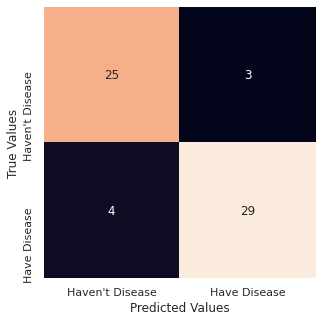

In [37]:
# (This is done to determine how model is performing on negative and positive data)
plt.figure(figsize=(5, 5))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, 
            annot=True, 
            cbar=False, 
            xticklabels=["Haven't Disease", "Have Disease"], 
            yticklabels=["Haven't Disease", "Have Disease"])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

<h2>Receiver Operating Characteristic Plot</h2>

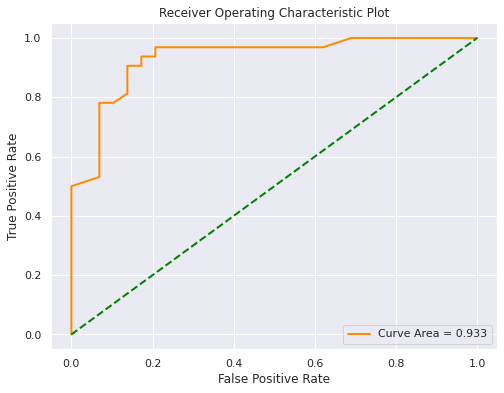

In [38]:
# Getting ROC AUC curve to check model performance
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_prob)
lw = 2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 
          color='darkorange', 
          lw=lw, 
          label="Curve Area = %0.3f" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='green', 
          lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
plt.legend(loc="lower right")
plt.show()

<h2>Classification Report</h2>

In [39]:
# Checking multiplication report over the model performance
print(" Classification Report" + "\n" + "="*60)
print(classification_report(y_test,
                            y_pred,
                            target_names=['Non Disease', 'Disease']))

 Classification Report
              precision    recall  f1-score   support

 Non Disease       0.89      0.86      0.88        29
     Disease       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<h2>Top 5 features</h2>

In [0]:
#Names of the features
features_name = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldPeak","slope","ca","thal"]

#Getting important features from the model
importances = model.feature_importances_


In [41]:
imp = np.argsort(importances)[::-1][:5]


count = 0
for index,feature_index in enumerate(imp):
    print(str(index + 1) + '  ' + features_name[feature_index])


1  ca
2  oldPeak
3  cp
4  thalach
5  thal


<h2> Checking for a patient</h2>

In [0]:
#["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldPeak","slope","ca","thal"]

patient_data = [27,1,3,123,100,1,0,187,0,2.8,0,0,1]
data  = np.array(list(patient_data)).reshape(1, -1)

In [43]:
model.predict(data)

array([1])

In [44]:
if model.predict(data)[0] == 1:
  print("Person will get a heart attack")
else:
  print("You are safe")

Person will get a heart attack


<h2>Saving the Model</h2>

In [0]:
joblib.dump(model, open("model.joblib", 'wb'))